In [6]:
from epyc import JSONLabNotebook
import epydemic
import numpy as np
from parameters import *
import pandas as pd

In [7]:
df_1 = JSONLabNotebook(get_out_path("ex_1_sirq"), create=False).dataframe()
df_2 = JSONLabNotebook(get_out_path("ex_2_sirq_IQ"), create=False).dataframe()
df_3 = JSONLabNotebook(get_out_path("ex_3_sirq_STO"), create=False).dataframe()
df_4 = JSONLabNotebook(get_out_path("ex_4_sirq_RDM"), create=False).dataframe()

In [8]:
json_lab_3 = JSONLabNotebook("../sec_7_1_test_trace_and_isolate/datasets/ex_3_seir.json", create=False)
json_lab_4 = JSONLabNotebook("../sec_7_1_test_trace_and_isolate/datasets/ex_4_seir.json", create=False)

In [9]:
dfs_1 = [json_lab_3.dataframe(tag=rs) for rs in json_lab_3.resultSets()]
dfs_2 = [json_lab_4.dataframe(tag=rs) for rs in json_lab_4.resultSets()]
dfs = dfs_1 + dfs_2
df = pd.concat(dfs)
df["R-Equilibrium"] = df[epydemic.SEIR.REMOVED] / n

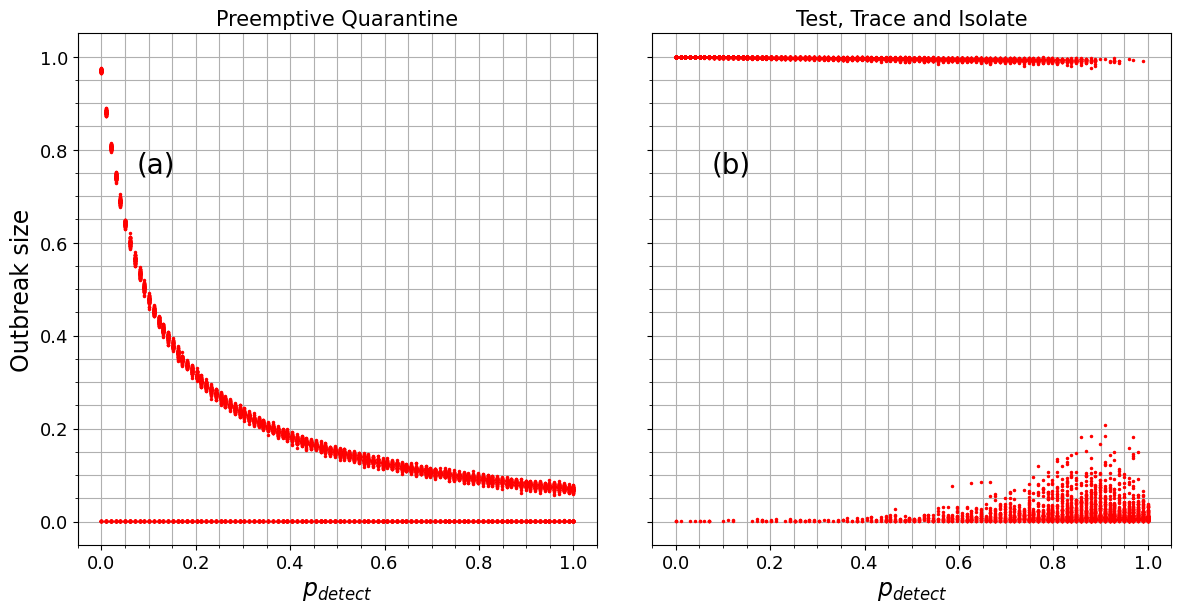

In [10]:
fig,  (ax1,ax2) = plt.subplots(1,2,  sharex=True, sharey=True, figsize=(12,6))

fig.tight_layout()

ax1.set_title('Preemptive Quarantine')
ax2.set_title('Test, Trace and Isolate')

ax1.plot(df_3["pDetect"],
        df_3[epydemic.SIR.REMOVED] / n , 'r.', label="Continuous: Stochastic Events", markersize=3)

ax2.plot(df["pDetect"], df["R-Equilibrium"], 'r.', label="Simulation", markersize=3)

ax1.text(0.075, 0.75, f"(a)", fontsize=20)
ax2.text(0.075, 0.75, f"(b)", fontsize=20)
ax1.set_ylabel('Outbreak size')
ax1.set_xlabel('$p_{detect}$')
ax2.set_xlabel('$p_{detect}$')



ax1.grid(which = "both")
ax2.grid(which = "both")
ax1.minorticks_on()
_ = plt.show()